1. The distribution of the happiness score
2. How do some factors affect happiness score?
3. How do the economy and family life impact each other? 
4. How are happiness scores changing throughout the years of some countries?
5. Can the happiness score of the United States be predicted?
6. How are Corruption and GDP per capita classified?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

In [2]:
df = pd.read_excel('data.xlsx')
df = df.rename(columns = {'Life Ladder': 'Happiness Score'})
df.head()

,Country name,Year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440


In [3]:
df.isnull().sum()

Country name                           0
Year                                   0
Happiness Score                        0
Log GDP per capita                    28
Social support                        13
Healthy life expectancy at birth      28
Freedom to make life choices          29
Generosity                            82
Perceptions of corruption             96
Positive affect                       19
Negative affect                       13
Confidence in national government    174
dtype: int64

In [4]:
"df = df.fillna(method = 'ffill')"
df.describe()

,Year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
count,1704.000000,1704.000000,1676.000000,1691.000000,1676.000000,1675.000000,1622.000000,1608.000000,1685.000000,1691.000000,1530.000000
mean,2012.332160,5.437155,9.222456,0.810570,63.111971,0.733829,0.000079,0.751315,0.709368,0.265679,0.481973
std,3.688072,1.121149,1.185794,0.119210,7.583622,0.144115,0.163365,0.186074,0.107984,0.084707,0.192059
min,2005.000000,2.661718,6.457201,0.290184,32.299999,0.257534,-0.336385,0.035198,0.362498,0.083426,0.068769
25%,2009.000000,4.610970,8.304428,0.747512,58.299999,0.638436,-0.115534,0.696083,0.621855,0.205414,0.334735
50%,2012.000000,5.339557,9.406206,0.833098,65.000000,0.752731,-0.022080,0.805775,0.718541,0.254544,0.464109
75%,2015.000000,6.273522,10.193060,0.904432,68.300003,0.848155,0.093522,0.876458,0.801530,0.314896,0.614862
max,2018.000000,8.018934,11.770276,0.987343,76.800003,0.985178,0.677743,0.983276,0.943621,0.704590,0.993604


In [5]:
'''All of countries in this dataset'''
df['Country name'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 'Jord

In [6]:
len(df['Country name'].unique())

165

There are 165 countries in this dataset.

In [7]:
"""Selecting randomly 10 countries"""
df.sample(10)

,Country name,Year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
979,Mexico,2007,6.525378,9.703313,0.878806,66.320000,0.670430,-0.097906,0.746681,0.815721,0.248498,0.418147
1586,United Arab Emirates,2014,6.539855,11.065750,NaN,66.480003,NaN,NaN,NaN,NaN,NaN,NaN
881,Lithuania,2014,6.125724,10.175734,0.908240,65.300003,0.507947,-0.267569,0.956348,0.619343,0.286911,0.344657
546,Ghana,2007,5.220148,7.891870,0.729648,52.779999,0.891153,0.145401,0.771188,0.685636,0.216630,0.721768
847,Lebanon,2009,5.205999,9.667031,0.736412,65.080002,0.664734,0.070523,0.937025,0.527855,0.401289,0.371837
1653,Venezuela,2017,5.070751,9.439296,0.895879,66.300003,0.635505,-0.206035,0.843969,0.725643,0.362985,0.241124
1074,Netherlands,2016,7.540877,10.763623,0.925944,72.099998,0.907310,0.233067,0.433304,0.838432,0.214851,0.572273
1162,Palestinian Territories,2014,4.721938,8.370901,0.775087,NaN,0.657050,-0.148277,0.804165,0.565057,0.380452,0.474314
1281,Saudi Arabia,2005,7.079644,10.726314,0.867819,63.500000,NaN,NaN,0.505149,0.729598,0.242553,NaN
1113,Niger,2017,4.615674,6.830874,0.582110,53.000000,0.683558,-0.017152,0.777660,0.731161,0.426522,0.601117


In [8]:
'''Variables'''
df.columns

Index(['Country name', 'Year', 'Happiness Score', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government'],
      dtype='object')

In [9]:
"""Data of 2018 only"""

df_2018 = df[df.Year == 2018]
df_2018.head(20)

,Country name,Year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
10,Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666
21,Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338
28,Algeria,2018,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN
45,Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352
58,Armenia,2018,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828
70,Australia,2018,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837
81,Austria,2018,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679
94,Azerbaijan,2018,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372
116,Bangladesh,2018,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693
129,Belarus,2018,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279


/Users/tl/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/tl/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


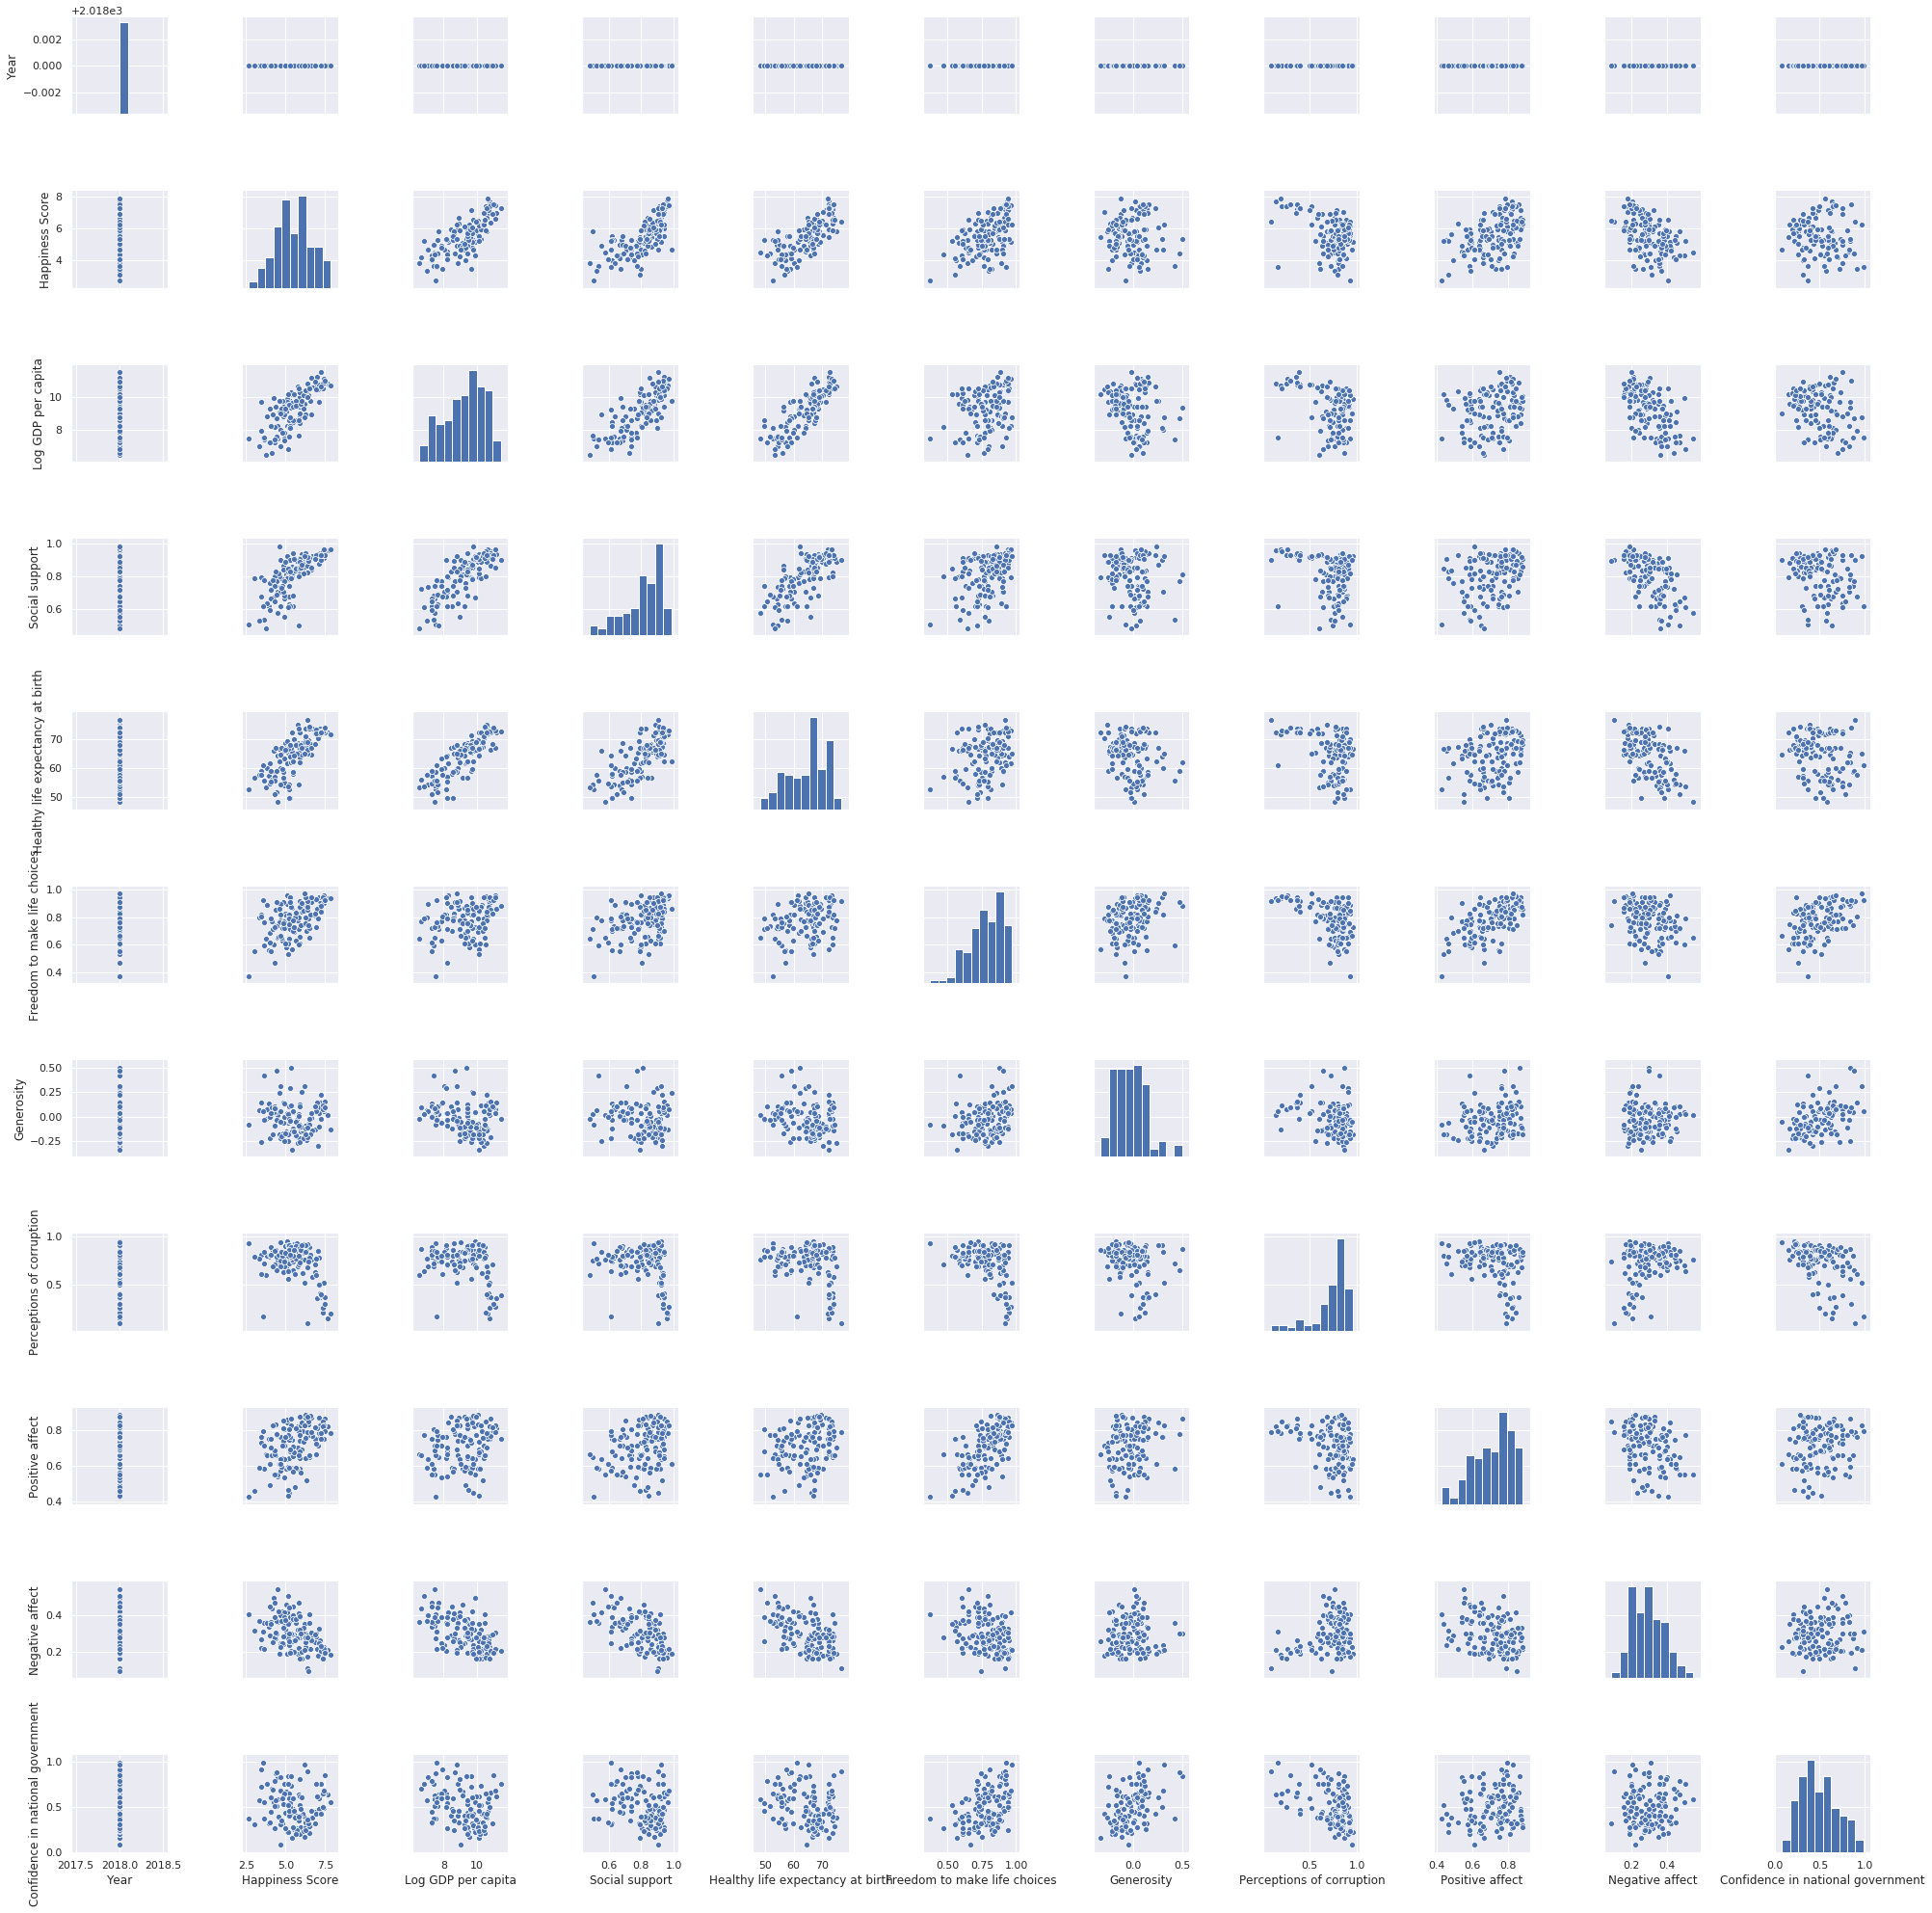

In [10]:
sns.pairplot(df_2018)

# 1. The distribution of the happiness score

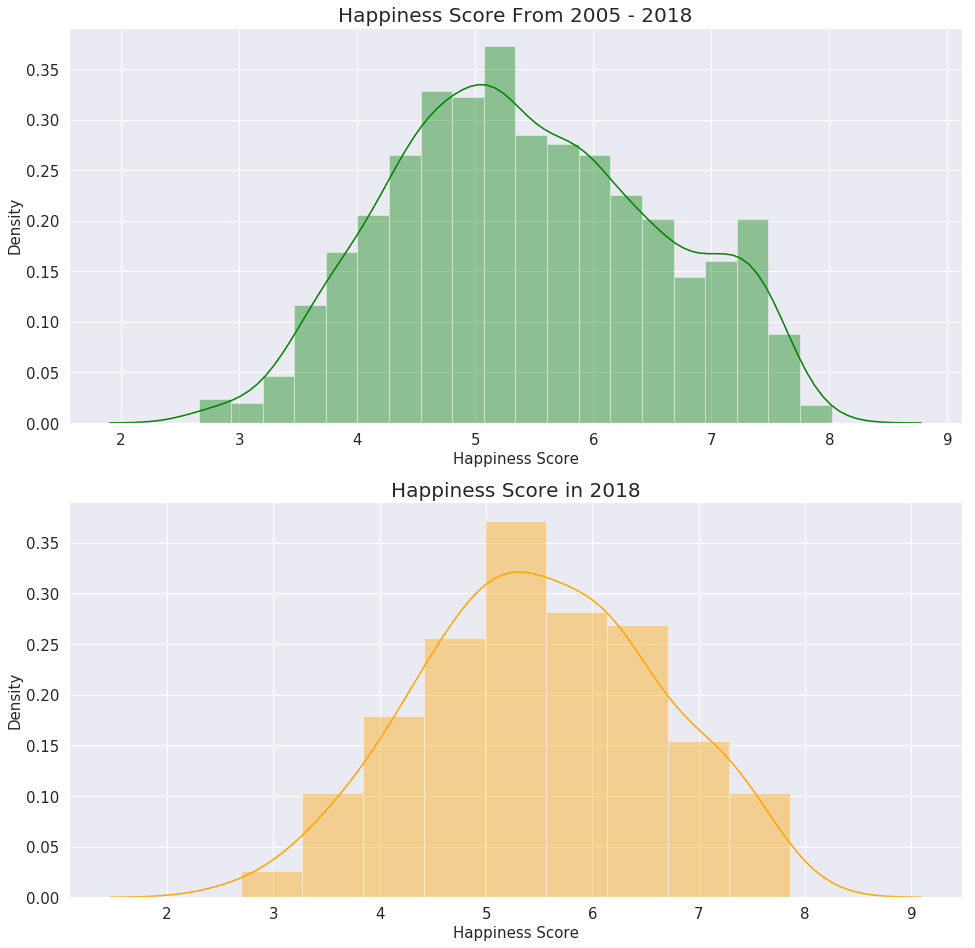

In [11]:
"""Happiness score distribution since 2005 v 2018"""

plt.figure(figsize = (16, 16))

"""plt.subplot(2, 1, 1)
sns.distplot(df['Happiness Score'], color = 'green')
plt.title('2005 - 2018')
plt.ylabel('Happiness Score')

plt.subplot(2, 1, 2)
sns.distplot(df_2018['Happiness Score'], color = 'orange')
plt.title('2018')
plt.ylabel('Happiness Score')"""


data = [df, df_2018]
n = 1
for i in data:
    plt.subplot(2, 1, n)
    sns.distplot(i['Happiness Score'],
                color = 'green' if n == 1 else 'orange')
    plt.title('Happiness Score From 2005 - 2018' if n == 1 else 'Happiness Score in 2018', size = 20)
    plt.ylabel('Density', size = 15)
    plt.xlabel('Happiness Score', size = 15)
    plt.tick_params(labelsize=15)
    n+=1
    


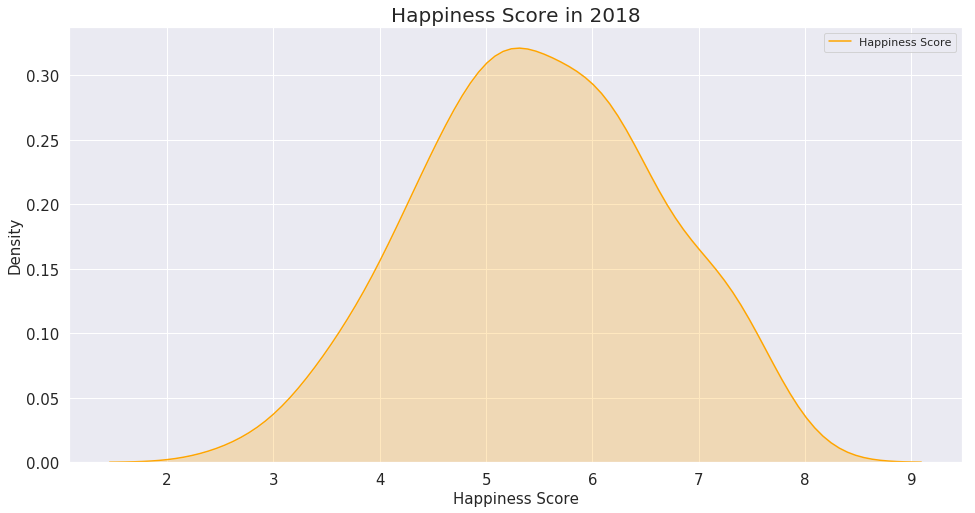

In [12]:
'''Other way to visualize - Normal Distribution'''

plt.figure(figsize = (16, 8))
sns.kdeplot(df_2018['Happiness Score'],
               shade = 'True', color = 'orange')
plt.title('Happiness Score in 2018', size = 20)
plt.ylabel('Density', size = 15)
plt.xlabel('Happiness Score', size = 15)
plt.tick_params(labelsize=15)

In [13]:
print(df['Happiness Score'].quantile([0.25,0.5,0.75]).round(1))
print('Max: ', df['Happiness Score'].max().round(1))
print('Min:', df['Happiness Score'].min().round(1))

0.25    4.6
0.50    5.3
0.75    6.3
Name: Happiness Score, dtype: float64
Max:  8.0
Min: 2.7


In [14]:
'2008 - 2018 distribution'
dist = [[2.7, 4.6, 5.3, 6.3, 8.0]]
dist_df = pd.DataFrame(dist, columns = ['Minimum', '1st Quartile', 'Median',
                                       '3rd Quartile', 'Maximum'])
dist_df

,Minimum,1st Quartile,Median,3rd Quartile,Maximum
0,2.7,4.6,5.3,6.3,8.0


In [15]:
print(df_2018['Happiness Score'].quantile([0.25,0.5,0.75]).round(1))
print('Max: ', df_2018['Happiness Score'].max().round(1))
print('Min:', df_2018['Happiness Score'].min().round(1))

0.25    4.7
0.50    5.5
0.75    6.3
Name: Happiness Score, dtype: float64
Max:  7.9
Min: 2.7


In [16]:
'''2018 Distribution'''
dist_2018 = [[2.7, 4.7, 5.5, 6.3, 7.9]]
dist_df2018 = pd.DataFrame(dist_2018, columns = ['Minimum', '1st Quartile', 'Median',
                                       '3rd Quartile', 'Maximum'])
dist_df2018

,Minimum,1st Quartile,Median,3rd Quartile,Maximum
0,2.7,4.7,5.5,6.3,7.9


# 2. How do some factors affect happiness score?

   ## 2.1 Factors affect happiness score

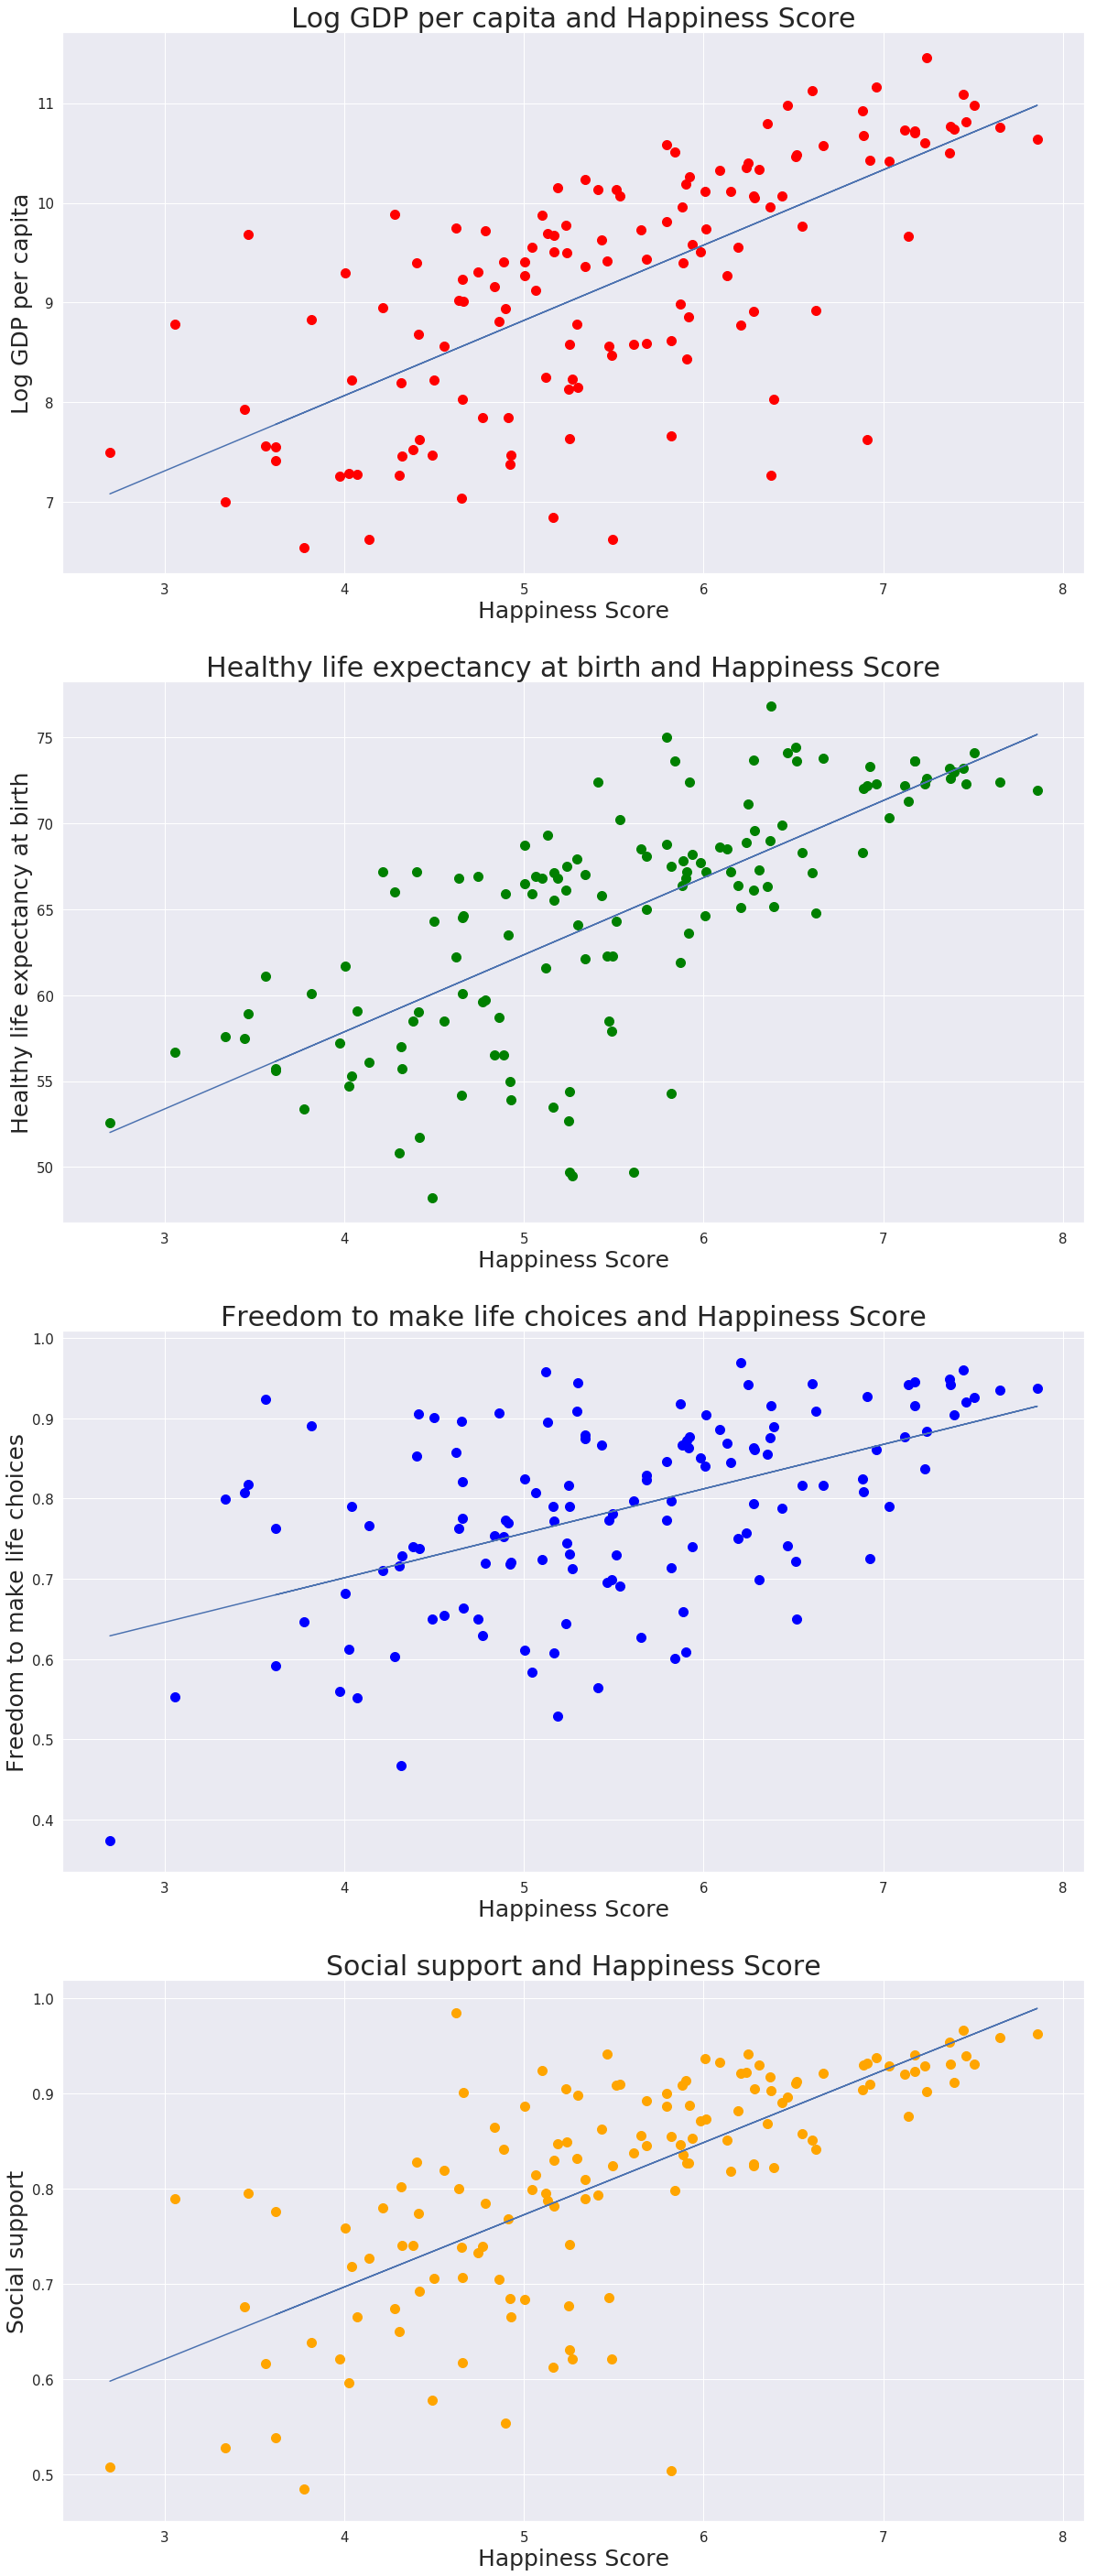

In [17]:
plt.figure(figsize = (20, 50))
n = 0

'''Fill missing data'''
df_2018 = df_2018.fillna(method = 'ffill')

'''Import linear model'''
from sklearn import linear_model


factors_2018 = ['Log GDP per capita', 'Healthy life expectancy at birth',
               'Freedom to make life choices', 'Social support']

for i, j in zip(range(1, 5), factors_2018):
    
    plt.subplot(4, 1, i)
    
    a = df_2018[['Happiness Score']]
    b = df_2018[j]
    
    data_2018 = linear_model.LinearRegression()
    data_2018.fit(a, b)
    
    color_s = ['red', 'green', 'blue', 'orange']
    
    plt.scatter(df_2018['Happiness Score'], df_2018[j], c = color_s[n], s = 100)
    plt.plot(a, data_2018.predict(a))
    plt.title(j + ' and Happiness Score', size = 30)
    plt.xlabel('Happiness Score', size = 25)
    plt.ylabel(j, size = 25)
    plt.tick_params(labelsize=15)
    n+=1


Looking at the charts, we can these factors all impact the score

## 2.2 Use these factors to predict happiness score

In [18]:
M = df_2018[['Log GDP per capita', 'Healthy life expectancy at birth',
               'Freedom to make life choices', 'Social support']]
n = df_2018[['Happiness Score']]

lr = linear_model.LinearRegression()
lr.fit(M, n)
lr.score(M, n)

0.6714208744220627

The score is 0.67, let's train these data

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(M, n, test_size=0.2)

In [20]:
mo = linear_model.LinearRegression()
mo.fit(x_train, y_train)
mo.score(x_test, y_test)

0.7787359246162173

The score in test set is improved.

In [21]:
x_test.round(2)

,Log GDP per capita,Healthy life expectancy at birth,Freedom to make life choices,Social support
1444,10.77,72.6,0.94,0.93
843,10.18,66.8,0.61,0.91
1566,7.46,55.7,0.73,0.74
226,7.47,53.9,0.72,0.66
1516,7.29,54.7,0.61,0.60
895,11.45,72.6,0.88,0.90
169,8.86,63.6,0.86,0.83
508,10.57,73.8,0.82,0.92
81,10.74,73.0,0.90,0.91
1051,9.16,56.5,0.75,0.86


In [22]:
'''Predict happiness score from the test data above'''
mo.predict(x_test)

array([[6.79722282],
       [5.57185562],
       [4.40716524],
       [4.13663546],
       [3.73282926],
       [6.72817878],
       [5.57575242],
       [6.50275391],
       [6.68128622],
       [5.10379544],
       [5.9487139 ],
       [4.62937134],
       [6.83103793],
       [4.15618419],
       [4.58682257],
       [5.47114197],
       [6.43209041],
       [5.02869636],
       [6.26456309],
       [5.11148293],
       [5.11004607],
       [3.94829264],
       [4.88521223],
       [6.75829691],
       [6.1327416 ],
       [5.86781456],
       [5.69458014],
       [3.90084959]])

# 3. How do the economy and family life impact each other?
GDP per capita and Healthy life

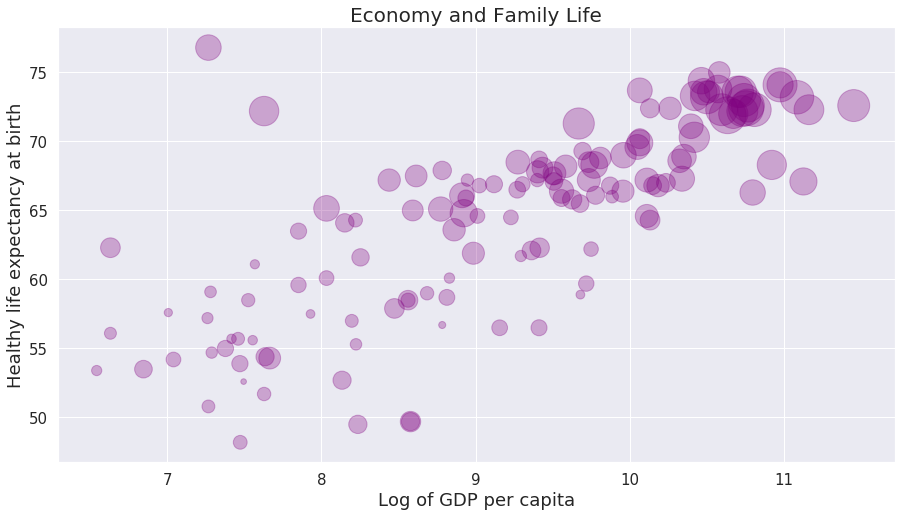

In [23]:
plt.figure(figsize = (15, 8))
plt.scatter(df_2018['Log GDP per capita'],
            df_2018['Healthy life expectancy at birth'],
            s = df_2018['Happiness Score']**3.5,
            alpha = 0.3,
            c='purple')
plt.title('Economy and Family Life', size = 20)
plt.xlabel('Log of GDP per capita', size = 18)
plt.ylabel('Healthy life expectancy at birth', size = 18)
plt.tick_params(labelsize=15)


Another way to visualize this.

(40, 80)

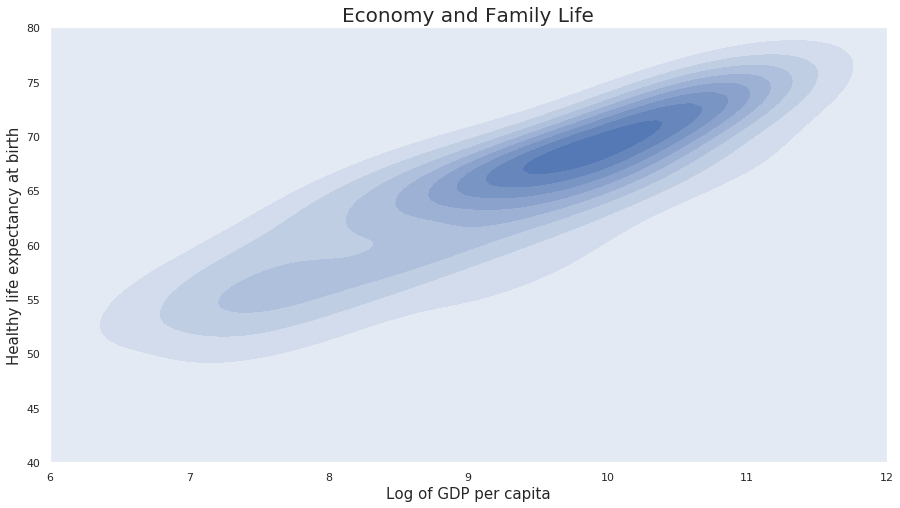

In [24]:
plt.figure(figsize = (15, 8))
sns.kdeplot(df_2018['Log GDP per capita'],
            df_2018['Healthy life expectancy at birth'],
           shade = True)
plt.title('Economy and Family Life', size = 20)
plt.xlabel('Log of GDP per capita', size = 15)
plt.ylabel('Healthy life expectancy at birth', size = 15)
plt.xlim(6, 12)
plt.ylim(40, 80)

# 4. How are happiness scores changing throughout the years of some countries?

In [25]:
usa = df[df['Country name'] == 'United States']
india = df[df['Country name'] == 'India']
france = df[df['Country name'] == 'France']
south_africa = df[df['Country name'] == 'South Africa']
brazil = df[df['Country name'] == 'Brazil']

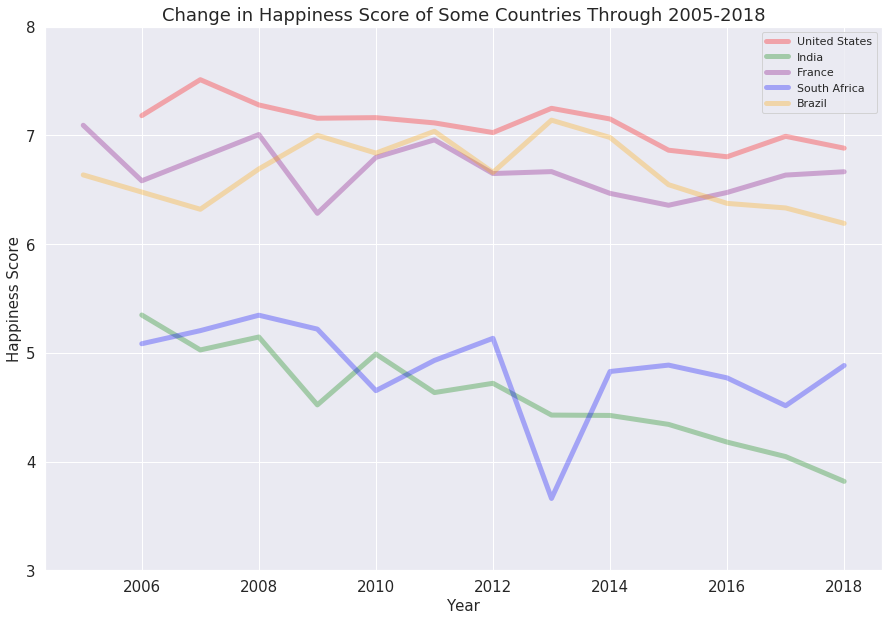

In [26]:
"""Year and Happiness Score of some countries"""
ax, fig = plt.subplots(figsize = (15, 10))

happiness_score = [usa, india, france, south_africa, brazil]
happiness_score2 = ['United States', 'India', 'France', 'South Africa', 'Brazil']
color = ['red', 'green', 'purple', 'blue', 'orange']
for i, j in zip(happiness_score, color):
    #sns.plot(i['Year'], i['Happiness Score'], 'ro')
    sns.lineplot(x = 'Year',
                 y = 'Happiness Score',
                 color = j,
                 alpha = 0.3,
                 linewidth = 5,
                 data = i)
    plt.ylim(3, 8)
plt.legend(happiness_score2)
plt.title('Change in Happiness Score of Some Countries Through 2005-2018', size = 18)
plt.xlabel('Year', size = 15)
plt.ylabel('Happiness Score', size = 15)
plt.tick_params(labelsize=15)

In [27]:
"""Data of United States """
usa

,Country name,Year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
1604,United States,2006,7.181794,10.831686,0.964572,68.059998,0.911496,NaN,0.600309,0.827417,0.260511,0.558029
1605,United States,2007,7.512688,10.839805,NaN,68.220001,0.871904,0.188272,0.633035,0.828503,0.231679,0.393245
1606,United States,2008,7.280386,10.827426,0.952587,68.379997,0.877956,0.246029,0.668495,0.871968,0.226823,0.379221
1607,United States,2009,7.158032,10.790511,0.911794,68.540001,0.830684,0.192269,0.665394,0.843484,0.261661,0.503047
1608,United States,2010,7.163616,10.807183,0.926159,68.699997,0.828044,0.235522,0.689583,0.860642,0.231053,0.418276
1609,United States,2011,7.115139,10.815644,0.921705,68.680000,0.863202,0.152239,0.696926,0.836360,0.273379,0.382532
1610,United States,2012,7.026227,10.830132,0.903192,68.660004,0.822662,0.206243,0.710034,0.833771,0.259644,0.348856
1611,United States,2013,7.249285,10.839653,0.925397,68.639999,0.792256,0.265563,0.746894,0.813678,0.260328,0.288648
1612,United States,2014,7.151114,10.857497,0.902097,68.620003,0.866077,0.212869,0.702267,0.834294,0.281265,0.348671
1613,United States,2015,6.863947,10.878154,0.903571,68.599998,0.848753,0.210956,0.697543,0.813908,0.274688,0.346936


# 5. Predict United States Happiness Score next years

Using Linear Regression model from Scikit-learn library.

In [28]:
x = usa[['Year']]
y = usa['Happiness Score']

In [29]:
from sklearn import linear_model
reg_usa = linear_model.LinearRegression()
reg_usa.fit(x, y)
reg_usa.score(x, y)

0.6125847423723318

In [30]:
'''Training data'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [31]:
reg = linear_model.LinearRegression()
reg.fit(x_test, y_test)
reg.score(x_test, y_test)

0.44352250547335165

The score is improved after training with score of 0.92

In [32]:
x_test

,Year
1611,2013
1609,2011
1607,2009


In [33]:
y_test

1611    7.249285
1609    7.115139
1607    7.158032
Name: Happiness Score, dtype: float64

In [34]:
reg.predict([[2020]])

array([7.37947086])

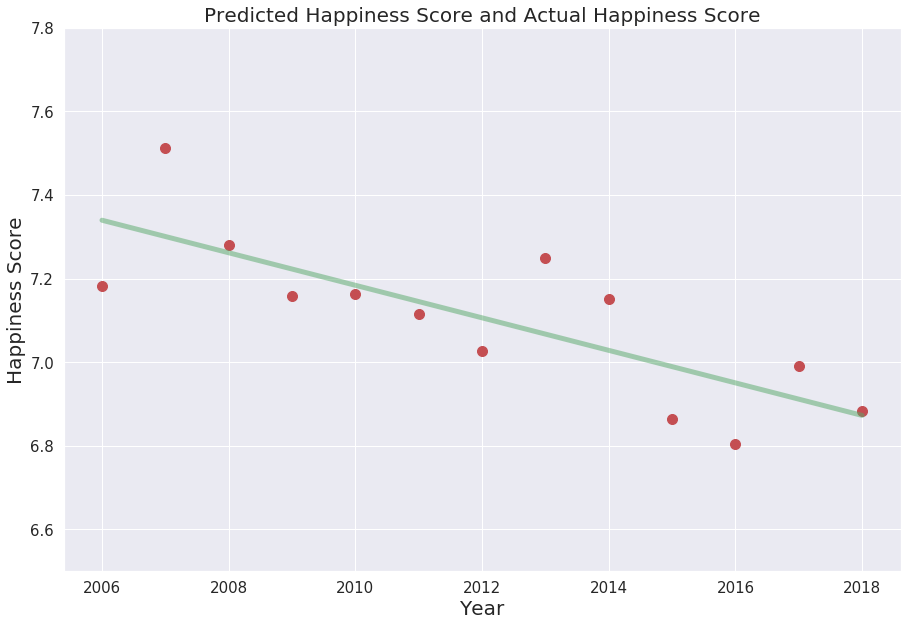

In [35]:
ax, fig = plt.subplots(figsize = (15, 10))
plt.scatter(usa['Year'], usa['Happiness Score'], s = 100, c = 'r')
plt.plot(x, reg_usa.predict(x), linewidth = 5, alpha = 0.5, c = 'g')
plt.xlabel('Year', size = 20)
plt.ylabel('Happiness Score', size = 20)
plt.title('Predicted Happiness Score and Actual Happiness Score', size = 20)
plt.ylim(6.5, 7.8)
plt.tick_params(labelsize=15)

In [36]:
us = usa['Happiness Score'].round(1)
us


1604    7.2
1605    7.5
1606    7.3
1607    7.2
1608    7.2
1609    7.1
1610    7.0
1611    7.2
1612    7.2
1613    6.9
1614    6.8
1615    7.0
1616    6.9
Name: Happiness Score, dtype: float64

In [37]:
for i in range(2006, 2019):
    print('Year', i, reg_usa.predict([[i]]).round(1))

Year 2006 [7.3]
Year 2007 [7.3]
Year 2008 [7.3]
Year 2009 [7.2]
Year 2010 [7.2]
Year 2011 [7.1]
Year 2012 [7.1]
Year 2013 [7.1]
Year 2014 [7.]
Year 2015 [7.]
Year 2016 [7.]
Year 2017 [6.9]
Year 2018 [6.9]


In [38]:
'''2019 and 2020'''
for i in range(2019, 2021):
    print('Year', i, reg_usa.predict([[i]]).round(2))

Year 2019 [6.83]
Year 2020 [6.79]


In [39]:
cols = ['', 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
predicted_score = [['Predicted Score', 7.3, 7.3, 7.3, 7.2, 7.2, 7.1, 7.1, 7.1, 7, 7, 7, 6.9, 6.9]]
actual_score = [['Actual Score', 7.2, 7.5, 7.3, 7.2, 7.2, 7.1, 7.0, 7.2, 7.2, 6.9, 6.8, 7, 6.9]]
happiness_score1 = pd.DataFrame(predicted_score, columns = cols)
happiness_score2 = pd.DataFrame(actual_score, columns = cols)
happiness_score = pd.concat([happiness_score1, happiness_score2])

happiness_score

,,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Predicted Score,7.3,7.3,7.3,7.2,7.2,7.1,7.1,7.1,7.0,7.0,7.0,6.9,6.9
0,Actual Score,7.2,7.5,7.3,7.2,7.2,7.1,7.0,7.2,7.2,6.9,6.8,7.0,6.9


Seems like the United States' happiness score will continue declicing for next several years according to World Happiness Report's current data.

Trying to use other regresssion model such as Support Vector Machine Regression and Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf.fit(x, y)
rf.score(x, y)

/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8563750337817272

In [41]:
from sklearn.svm import SVR
sv = SVR()
sv.fit(x, y)
sv.score(x, y)

/Users/tl/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8335703346517114

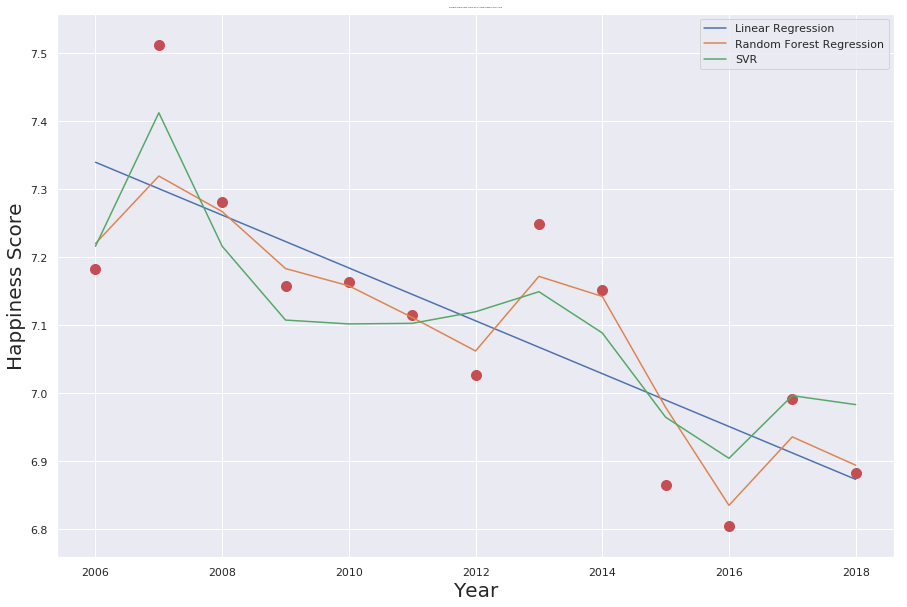

In [42]:
ax, fig = plt.subplots(figsize = (15, 10))
plt.scatter(usa['Year'], usa['Happiness Score'], s = 100, c = 'r')
plt.plot(x, reg_usa.predict(x))
plt.plot(x, rf.predict(x))
plt.plot(x, sv.predict(x))
plt.xlabel('Year', size = 20)
plt.ylabel('Happiness Score', size = 20)
plt.title('Predict Happiness Score and Actual Happiness Score', size = 2)
plt.legend(["Linear Regression", "Random Forest Regression", "SVR"])

This is how the score is predicted using Support Vector Machine Regression and Random Forest Regression, they are more accurate than Linear Regression (pre-training).

# 6. How are Corruption and GDP per capita classified?
How factors affect each other?

Let's see how economy and corruption affect each other.

In [43]:
df_2018 = df_2018.fillna(method = 'ffill')
#Fill some data missing by average all other existing data

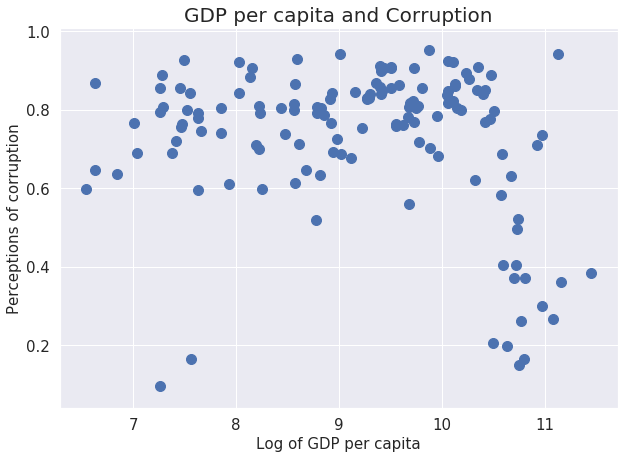

In [44]:
plt.figure(figsize = (10, 7))
plt.scatter(df_2018['Log GDP per capita'],
            df_2018['Perceptions of corruption'], s = 100)
plt.xlabel('Log of GDP per capita', size = 15)
plt.ylabel('Perceptions of corruption', size = 15)
plt.title('GDP per capita and Corruption', size = 20)
plt.tick_params(labelsize=15)

Using KMeans cluster from skit-learn to see how these factors are grouped.

In [45]:
from sklearn.cluster import KMeans

X = df_2018[['Log GDP per capita', 'Perceptions of corruption']]
km_iner = []
for i in range(1, 8):
    km = KMeans(n_clusters = i)
    km.fit(X)
    km_iner.append(km.inertia_)

First, we need to use elbow point to choose number of clusters

Text(0.5, 0, 'Number of clusters')

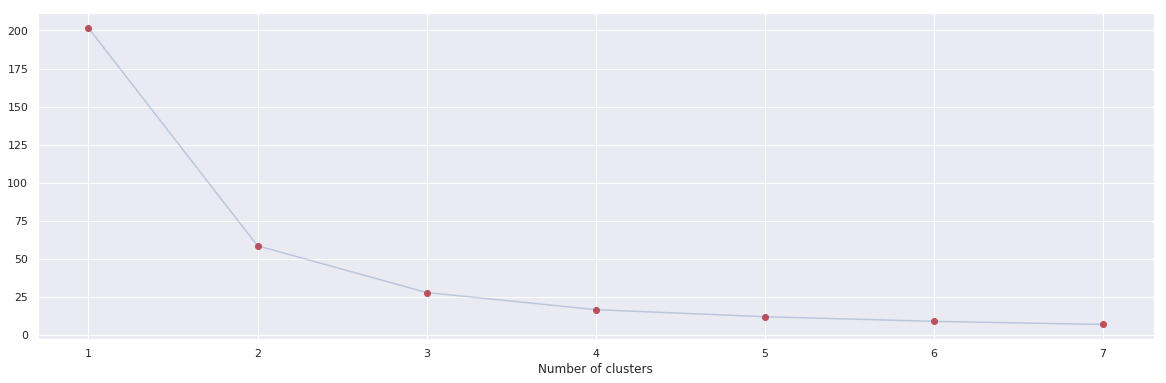

In [46]:
ax, figsize = plt.subplots(figsize = (20, 6))
plt.plot(range(1, 8), km_iner, 'ro')
# range(1, 12) = np.arange(1, 12)
plt.plot(np.arange(1, 8), km_iner, '-', alpha = 0.3)
plt.xlabel('Number of clusters')

From the graph, cluster = 2 and = 3 are chosen

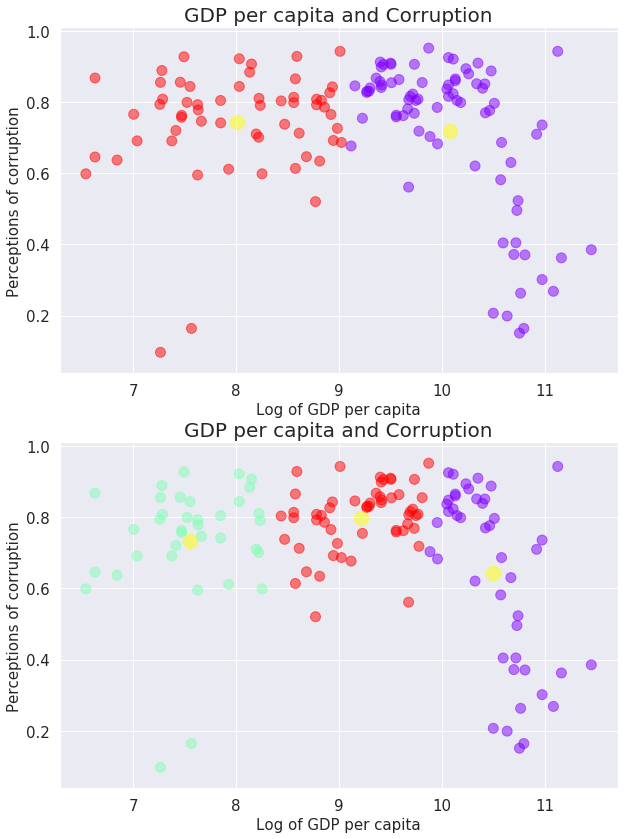

In [47]:
ax, figsize = plt.subplots(figsize = (10, 14))

n_clus = [2, 3]
n = 1
for i in n_clus:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_
    
    plt.subplot(2, 1, n)
    
    plt.scatter(df_2018['Log GDP per capita'],
            df_2018['Perceptions of corruption'],
            c=y_kmeans, s=100, alpha = 0.5, cmap='rainbow')
    plt.scatter(centers[:, 0], centers[:,1], c = 'yellow', s = 200, alpha = 0.5)
    plt.xlabel('Log of GDP per capita', size = 15)
    plt.ylabel('Perceptions of corruption', size = 15)
    plt.title('GDP per capita and Corruption', size = 20)
    plt.tick_params(labelsize=15)
    n+=1

Conclusion:

Clusters = 2: The economies are slow, the more corruption. Meanwhile the GDP is higher, the corruption is less.

Cluster = 3: The economies are slow and developing tend to have more corruption than developed economies.